/Users/JordanBrook/.local/lib/python3.6/site-packages/pymeso-0.1-py3.6.egg/pymeso/vortex.py:97: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/JordanBrook/.local/lib/python3.6/site-packages/pymeso-0.1-py3.6.egg/pymeso/vortex.py:98: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/Users/JordanBrook/.local/lib/python3.6/site-packages/pymeso-0.1-py3.6.egg/pymeso/vortex.py:34: RuntimeWarning: invalid value encountered in double_scalars


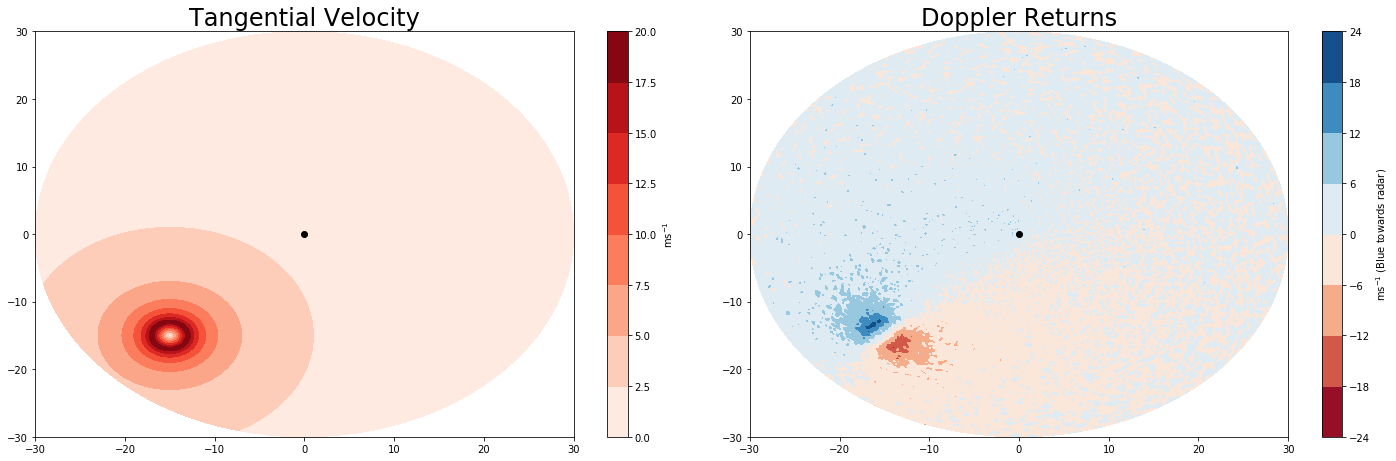

In [18]:
##################
#Example of running and plotting of vortex function from PyMeso
##################

import pymeso.vortex
import numpy as np
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
%matplotlib inline

#run the vortex code with desired properties
x,y,U,V,doppler=pymeso.vortex.polar_vortex(1,.25,30,[-15,-15],2,20,True,True)

#calculate tangential velocity parameter for plotting
TV= np.sqrt(U**2+V**2)

#plot tangential velocity and doppler returns
fig = plt.figure(figsize=[20,12],facecolor='white')
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
fig.tight_layout()
neg2 = ax1.contourf((x), (y), TV, cmap=cm.Reds,) 
fig.colorbar(neg2, ax=ax1,label='ms$^{-1}$')
neg = ax2.contourf((x), (y), -doppler, cmap=cm.RdBu,) 
fig.colorbar(neg, ax=ax2,label='ms$^{-1}$ (Blue towards radar)')
ax1.set_title('Tangential Velocity',fontsize='24')
ax2.set_title('Doppler Returns',fontsize='24')
ax2.plot(0,0,'ko')
ax1.plot(0,0,'ko')

LLSD COMPUTE --- 1.4392554759979248 seconds ---


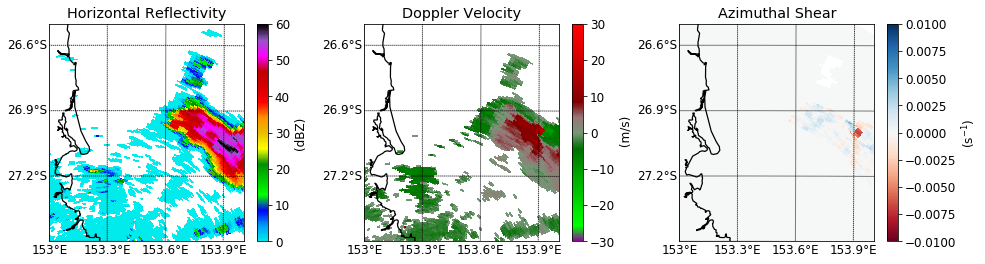

In [4]:
##################
#Example of running and plotting of llsd function from PyMeso
##################

import time
import pymeso.llsd
import pyart
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.colors as colors


#function to dealiase the Doppler velocity
def dealiase(radar, vel_name):
    #check to see if radar object has nyquist velocity
    try: 
        gatefilter = pyart.correct.GateFilter(radar)
        corr_vel   = pyart.correct.dealias_region_based(
            radar, vel_field=vel_name, keep_original=False, gatefilter = gatefilter)
        radar.add_field(vel_name, corr_vel, True)
    except:
        None

#import radar object
radar = pyart.aux_io.read_odim_h5('/home/548/jss548/dev/tmp/testing_files/66_20131115_232425.pvol.h5', file_field_names=True)

#dealiase Doppler field
dealiase(radar,'velocity')

#call the llsd function form llsd.py
start_time = time.time()
az_shear_meta = pymeso.llsd.main(radar,'DBZH','VRADH')
print("LLSD COMPUTE --- %s seconds ---" % (time.time() - start_time))
radar.add_field('azi_shear', az_shear_meta, replace_existing=True)

#define constants as required for plotting
tilt = 0
minlat = -27.5
maxlat = -26.5
minlon = 153.0
maxlon = 154.0
v_min = -.01
v_max = .01
lat_lines = np.arange(minlat,maxlat,.3)
lon_lines = np.arange(minlon, maxlon, .3)

#plot reflectivity, Doppler velocity and llsd azimuthal shear using pyart
display = pyart.graph.RadarMapDisplay(radar)
f = plt.figure(figsize=[16,4],facecolor='white')
plt.rc('font', size=12)
plt.subplot(1,3,1)
f.subplots_adjust(hspace=.2)
display.plot_ppi_map('DBZH', tilt, title='Horizontal Reflectivity',vmin=0, vmax=60,colorbar_label='(dBZ)', 
                        lat_lines = lat_lines, lon_lines = lon_lines, 
                        max_lat = maxlat, min_lat =minlat, min_lon = minlon, max_lon = maxlon,
                       cmap = pyart.graph.cm.NWSRef,resolution = 'h')
ax = plt.gca()

plt.subplot(1,3,2)
f.subplots_adjust(hspace=.1)
display.plot_ppi_map('VRADH', tilt, title='Doppler Velocity',vmin=-30, vmax=30.0,colorbar_label=' (m/s)', 
                        lat_lines = lat_lines, lon_lines = lon_lines, 
                        max_lat = maxlat, min_lat =minlat, min_lon = minlon, max_lon = maxlon,
                       cmap = pyart.graph.cm.NWSVel,resolution = 'h')
ax = plt.gca()

plt.subplot(1,3,3)
f.subplots_adjust(hspace=.2)

display.plot_ppi_map('azi_shear',tilt,title='Azimuthal Shear',vmin=v_min, vmax=v_max,colorbar_label='(s$^{-1}$)',
                        lat_lines = lat_lines, lon_lines = lon_lines, 
                        max_lat = maxlat, min_lat =minlat, min_lon = minlon, max_lon = maxlon,
                       cmap=cm.RdBu,resolution = 'h')
ax = plt.gca()